In [66]:
from pycbc.waveform import get_fd_waveform, get_td_waveform
from pycbc.psd import aLIGOZeroDetLowPower

# Notes
# (1) Tf2E seems to use 10Hz as reference eccentricity
# (match does not seem to change if changing f_low on tf2e, but does on eccentricfd)

# (2) Tf2E does not seem to use 3.5 PN standard phasing corrections
# (match is high if phase_order set to 6 with no eccentricity)

# (3) Eccentric TD doesn't seem to match the other approximants at low eccentricity!!
# Disregard eccentric TD in lalsimulation?????

p = {'mass1':1.3, 'mass2':1.6,
     'delta_f':1.0/128, 
     'delta_t':1.0/4096,
     'distance':100, 
     'inclination': 0,
     'coa_phase' : 0, 
     'f_lower':9.5,
     'long_asc_nodes':0}

In [67]:
from pycbc.filter import match
import numpy

tlen = 128 * 4096
flen = tlen / 2 + 1

ec = numpy.arange(1e-5, 0.4, .025)
ms = []
for e in ec:
    p['eccentricity'] = e
    hp, hc = get_fd_waveform(approximant="TaylorF2e", **p)
    hp2, hc2 = get_fd_waveform(approximant="EccentricFD", **p)  
    hp2.resize(flen)
    hp.resize(flen)
    psd = aLIGOZeroDetLowPower(flen, hp.delta_f, 30.0)
    m, i = match(hp, hp2, psd=psd, low_frequency_cutoff=30, high_frequency_cutoff=800)
    ms.append(m)
    
    print e, m

1e-05 0.9794031300132451
0.02501 0.981593304946405
0.050010000000000006 0.9858755141679044
0.07501000000000001 0.9870223462711476
0.10001 0.9811388793319622
0.12501 0.9743080187947867
0.15001000000000003 0.9696226919061522
0.17501000000000003 0.9706829026052299
0.20001000000000002 0.9564803809860789
0.22501000000000002 0.8374445482090754
0.25001 0.5510392728515524
0.27501000000000003 0.4590568875540543
0.30001000000000005 0.370421617866172
0.32501 0.29509978687049077
0.35001000000000004 0.25280474727013247
0.37501 0.23160554888082485


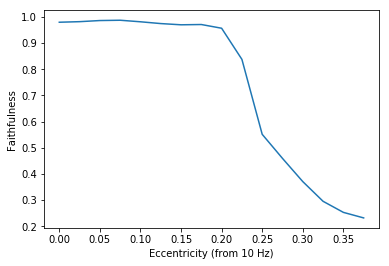

In [68]:
import pylab
pylab.plot(ec, ms)
pylab.ylabel('Faithfulness')
pylab.xlabel('Eccentricity (from 10 Hz)')
pylab.show()

In [17]:
%timeit hp, hc = get_fd_waveform(approximant="TaylorF2e", **p)
%timeit hp2, hc2 = get_fd_waveform(approximant="EccentricFD", **p)

1 loop, best of 3: 219 ms per loop
1 loop, best of 3: 859 ms per loop


In [92]:
from pycbc.filter import match
import scipy.optimize
import numpy

tlen = 128 * 4096
flen = tlen / 2 + 1
p['eccentricity'] = 0.4

def gl(fl, hp, e):
    fl = fl[0]

    p['f_lower'] = fl
    hp2, hc2 = get_fd_waveform(approximant="EccentricFD", **p)  
    hp2.resize(flen)

    m, i = match(hp, hp2, psd=psd, low_frequency_cutoff=30, high_frequency_cutoff=800)
    print e, fl, m
    return 1-m

def mmin(fun, dt, bounds=None, args=None, *args2, **kwds):
    a, b = bounds[0][0], bounds[0][1]
    vs = numpy.arange(a, b, dt)[::-1]
    minv, mina = 0, 100
    for v in vs:
        a = fun([v], *args)
        if a < mina:
            minv = v
            mina = a
    return minv, mina
                

ec = numpy.arange(1e-5, 0.4, .05)
ms = []
fs = []
for e in ec:
    p['eccentricity'] = e
    hp, hc = get_fd_waveform(approximant="TaylorF2e", **p)
    hp.resize(flen)

    f, m = mmin(gl, .2, args=(hp, e), bounds=[(3, 10.2)])
    #r = scipy.optimize.minimize(gl, [9.5], args=(hp, e), bounds=[(4, 12)], method='Nelder-Mead')
    #f = r['x'][0]
    #m = 1-r['fun']
    ms.append(m)
    fs.append(f)
    print e, f, m

print r


1e-05 10.000000000000007 0.9794031296153585
1e-05 9.800000000000006 0.9794031297770645
1e-05 9.600000000000005 0.9794031299353633
1e-05 9.400000000000006 0.979403130090281
1e-05 9.200000000000006 0.9794031302418055
1e-05 9.000000000000005 0.9794031303899512
1e-05 8.800000000000004 0.9794031305347347
1e-05 8.600000000000005 0.9794031306761571
1e-05 8.400000000000006 0.9794031308142168
1e-05 8.200000000000005 0.9794031309489358
1e-05 8.000000000000004 0.9794031310803144
1e-05 7.800000000000004 0.979403131208376
1e-05 7.600000000000004 0.9794031313331185
1e-05 7.400000000000004 0.9794031314545484
1e-05 7.200000000000004 0.9794031315726771
1e-05 7.0000000000000036 0.9794031316875095
1e-05 6.800000000000003 0.9794031317990657
1e-05 6.600000000000003 0.9794031319073517
1e-05 6.400000000000003 0.9794031320123803
1e-05 6.200000000000003 0.9794031321141612
1e-05 6.000000000000003 0.9794031322126994
1e-05 5.8000000000000025 0.9794031323080135
1e-05 5.600000000000002 0.9794031324001056
1e-05 5.40

0.20001000000000002 7.200000000000004 0.42780331890243406
0.20001000000000002 7.0000000000000036 0.40152441356896634
0.20001000000000002 6.800000000000003 0.3900411699887032
0.20001000000000002 6.600000000000003 0.393746365749187
0.20001000000000002 6.400000000000003 0.39710595238873597
0.20001000000000002 6.200000000000003 0.38979359287156295
0.20001000000000002 6.000000000000003 0.37445227969926403
0.20001000000000002 5.8000000000000025 0.36067361815704124
0.20001000000000002 5.600000000000002 0.35549680481654516
0.20001000000000002 5.400000000000002 0.357907447904735
0.20001000000000002 5.200000000000002 0.360879853930388
0.20001000000000002 5.000000000000002 0.35965994466875106
0.20001000000000002 4.800000000000002 0.3532105674930186
0.20001000000000002 4.600000000000001 0.3441520660213466
0.20001000000000002 4.400000000000001 0.3352913621139381
0.20001000000000002 4.200000000000001 0.3299265357220978
0.20001000000000002 4.000000000000001 0.32875329849200746
0.20001000000000002 3.8

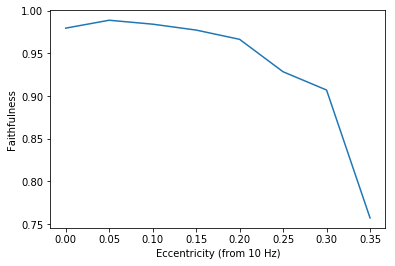

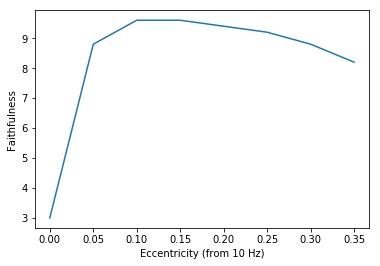

In [96]:
import pylab
pylab.plot(ec, 1-numpy.array(ms))
pylab.ylabel('Faithfulness')
pylab.xlabel('Eccentricity (from 10 Hz)')
pylab.show()

pylab.plot(ec, fs)
pylab.ylabel('Faithfulness')
pylab.xlabel('Eccentricity (from 10 Hz)')
pylab.show()